# Importing Necessary Libraries

In [63]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from datasets import load_dataset
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk

# Downloading Necessary Recources

In [66]:
nltk.download("wordnet")
nltk.download("omw-1.4")
nltk.download("stopwords")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Loading The Dataset

In [69]:
data = load_dataset("dair-ai/emotion")
df = pd.DataFrame(data["train"])

# Data Preprocessing

In [72]:
df.isnull().sum()

text     0
label    0
dtype: int64

In [74]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

In [76]:
def preprocess_text(text):
    tokens = text.split()
    lemmatized = [lemmatizer.lemmatize(word.lower()) for word in tokens if word.lower() not in stop_words]
    return " ".join(lemmatized)

In [78]:
df["text"] = df["text"].apply(preprocess_text)

In [80]:
X = df["text"]
y = df["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [82]:
# TF-IDF Vectorization
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Model 1-Support Vector Machine

In [99]:
# SVM Model
print("\nTraining SVM...")
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}
svm_grid_search = GridSearchCV(SVC(), svm_params, cv=5, scoring='f1_weighted', n_jobs=-1)
svm_grid_search.fit(X_train_tfidf, y_train)
svm_best_model = svm_grid_search.best_estimator_
svm_y_pred = svm_best_model.predict(X_test_tfidf)
svm_results = {
    "Best Params": svm_grid_search.best_params_,
    "Accuracy": accuracy_score(y_test, svm_y_pred),
    "Recall": recall_score(y_test, svm_y_pred, average='weighted'),
    "Precision": precision_score(y_test, svm_y_pred, average='weighted'),
    "F1 Score": f1_score(y_test, svm_y_pred, average='weighted')
}



Training SVM...


In [101]:
print("SVM Results:")
for metric, value in svm_results.items():
    print(f"{metric}: {value}")

SVM Results:
Best Params: {'C': 1, 'kernel': 'linear'}
Accuracy: 0.88625
Recall: 0.88625
Precision: 0.8858031739415029
F1 Score: 0.8848952659731567


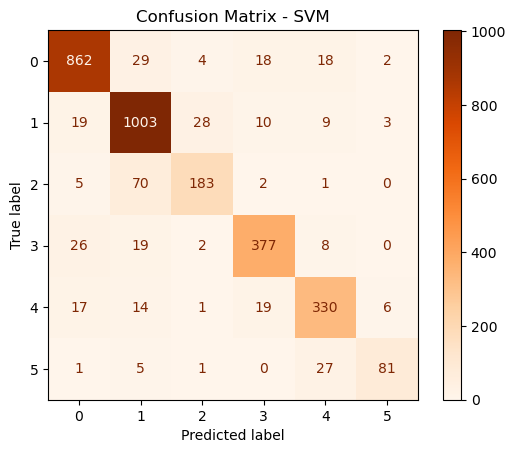

In [104]:

svm_cm = confusion_matrix(y_test, svm_y_pred, labels=svm_best_model.classes_)
ConfusionMatrixDisplay(svm_cm, display_labels=svm_best_model.classes_).plot(cmap="Oranges")
plt.title("Confusion Matrix - SVM")
plt.show()

# Model 2-  Random Forest

In [106]:
print("\nTraining Random Forest...")
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20]
}

rf_grid_search = GridSearchCV(RandomForestClassifier(), rf_params, cv=5, scoring='f1_weighted', n_jobs=-1)
rf_grid_search.fit(X_train_tfidf, y_train)
rf_best_model = rf_grid_search.best_estimator_
rf_y_pred = rf_best_model.predict(X_test_tfidf)
rf_results = {
    "Best Params": rf_grid_search.best_params_,
    "Accuracy": accuracy_score(y_test, rf_y_pred),
    "Recall": recall_score(y_test, rf_y_pred, average='weighted'),
    "Precision": precision_score(y_test, rf_y_pred, average='weighted'),
    "F1 Score": f1_score(y_test, rf_y_pred, average='weighted')
}

print("\nTrained Random Forest")



Training Random Forest...

Trained Random Forest


In [108]:
print("RF Results:")
for metric, value in rf_results.items():
    print(f"{metric}: {value}")

RF Results:
Best Params: {'max_depth': None, 'n_estimators': 100}
Accuracy: 0.8878125
Recall: 0.8878125
Precision: 0.8879234907487714
F1 Score: 0.8871276376063177


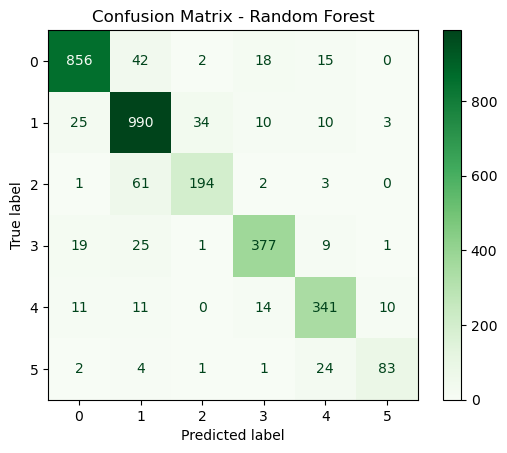

In [110]:
rf_cm = confusion_matrix(y_test, rf_y_pred, labels=rf_best_model.classes_)
ConfusionMatrixDisplay(rf_cm, display_labels=rf_best_model.classes_).plot(cmap="Greens")
plt.title("Confusion Matrix - Random Forest")
plt.show()

# Model 3- Naive Bayes

In [112]:
print("\nTraining Naive Bayes...")
nb_params = {
    'alpha': [0.1, 0.5, 1.0]
}


nb_grid_search = GridSearchCV(MultinomialNB(), nb_params, cv=5, scoring='f1_weighted', n_jobs=-1)
nb_grid_search.fit(X_train_tfidf, y_train)  # Replace X_train_tfidf and y_train with your data
nb_best_model = nb_grid_search.best_estimator_

nb_y_pred = nb_best_model.predict(X_test_tfidf)  # Replace X_test_tfidf with your test data
nb_results = {
    "Best Params": nb_grid_search.best_params_,
    "Accuracy": accuracy_score(y_test, nb_y_pred),
    "Recall": recall_score(y_test, nb_y_pred, average='weighted'),
    "Precision": precision_score(y_test, nb_y_pred, average='weighted'),
    "F1 Score": f1_score(y_test, nb_y_pred, average='weighted')
}

print("\nTrained Naive Bayes")


Training Naive Bayes...

Trained Naive Bayes


In [114]:
print("Naive Bayes Results:")
for metric, value in nb_results.items():
    print(f"{metric}: {value}")

Naive Bayes Results:
Best Params: {'alpha': 0.1}
Accuracy: 0.75125
Recall: 0.75125
Precision: 0.761603795495109
F1 Score: 0.7284309827358055


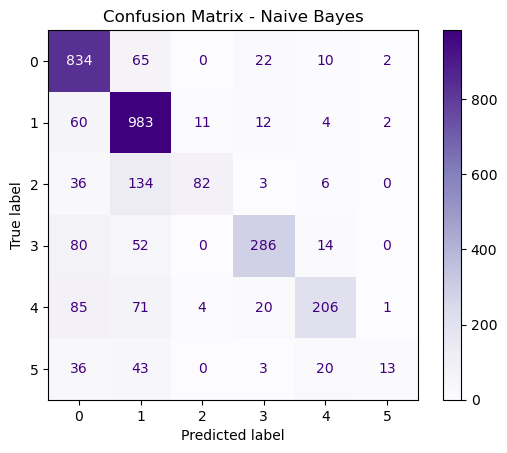

In [116]:
nb_cm = confusion_matrix(y_test, nb_y_pred, labels=nb_best_model.classes_)
ConfusionMatrixDisplay(nb_cm, display_labels=nb_best_model.classes_).plot(cmap="Purples")
plt.title("Confusion Matrix - Naive Bayes")
plt.show()

# Model Performances In a Barchart

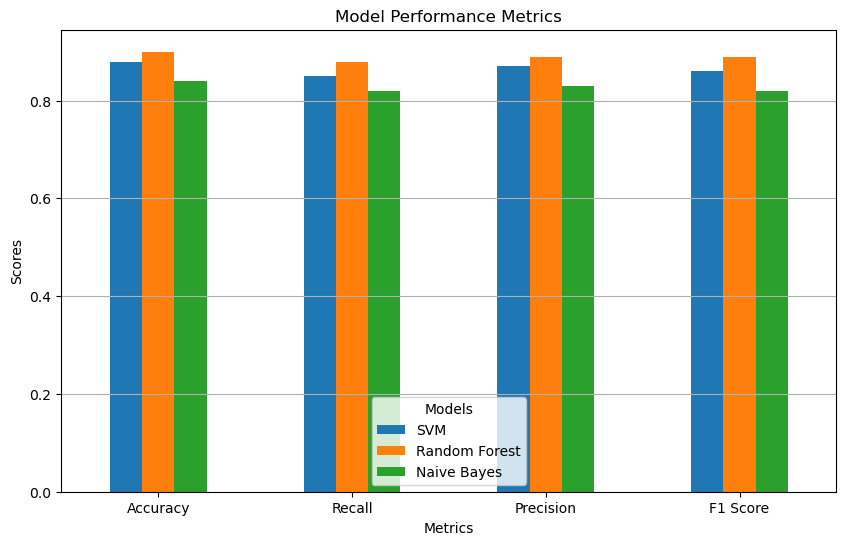

In [118]:
import pandas as pd
import matplotlib.pyplot as plt


results = {
    "SVM": {"Accuracy": 0.88, "Recall": 0.85, "Precision": 0.87, "F1 Score": 0.86},
    "Random Forest": {"Accuracy": 0.90, "Recall": 0.88, "Precision": 0.89, "F1 Score": 0.89},
    "Naive Bayes": {"Accuracy": 0.84, "Recall": 0.82, "Precision": 0.83, "F1 Score": 0.82},
}

metrics = ["Accuracy", "Recall", "Precision", "F1 Score"]
results_df = pd.DataFrame(
    {model: [results[model][metric] for metric in metrics] for model in results.keys()},
    index=metrics
)

results_df.plot(kind="bar", figsize=(10, 6), rot=0)
plt.title("Model Performance Metrics")
plt.xlabel("Metrics")
plt.ylabel("Scores")
plt.legend(title="Models")
plt.grid(axis="y")
plt.show()


# Displaying All the Results

In [120]:
for model, result in results.items():
    print(f"\nModel: {model}")
    for metric, value in result.items():
        print(f"{metric}: {value}")


Model: SVM
Accuracy: 0.88
Recall: 0.85
Precision: 0.87
F1 Score: 0.86

Model: Random Forest
Accuracy: 0.9
Recall: 0.88
Precision: 0.89
F1 Score: 0.89

Model: Naive Bayes
Accuracy: 0.84
Recall: 0.82
Precision: 0.83
F1 Score: 0.82


In [134]:
# Mapping emotion labels
emotion_mapping = {0: "sadness", 1: "joy", 2: "love", 3: "anger", 4: "fear", 5: "surprise"}

In [136]:
def predict_emotion(model, vectorizer, text):
    processed_text = preprocess_text(text)
    text_vectorized = vectorizer.transform([processed_text])
    prediction = model.predict(text_vectorized)[0]

    if prediction == 0:
        return "sadness"
    elif prediction == 1:
        return "joy"
    elif prediction == 2:
        return "love"
    elif prediction == 3:
        return "anger"
    elif prediction == 4:
        return "fear"
    elif prediction == 5:
        return "surprise"
    else:
        return "unknown"

In [142]:
example1 = "I'm grabbing a minute to post I feel greedy wrong."

In [144]:
predict_emotion(svm_grid_search,tfidf,example1)

'anger'

In [148]:
example2= "ive been taking or milligrams or times recommended amount and ive fallen asleep a lot faster but i also feel like so funny"

In [150]:
predict_emotion(nb_grid_search,tfidf,example2)

'sadness'

In [152]:
example3="i feel romantic too"

In [154]:
predict_emotion(rf_grid_search,tfidf,example3)

'love'